# Bitwise operations

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

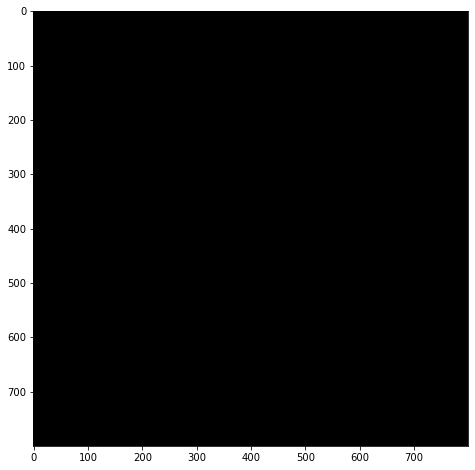

In [37]:
# With numpy create a black canvas of size 800 x 800 
black_canvas = np.zeros((800, 800), np.uint8)

plt.figure(figsize=(12, 8))
plt.imshow(black_canvas, cmap='gray');

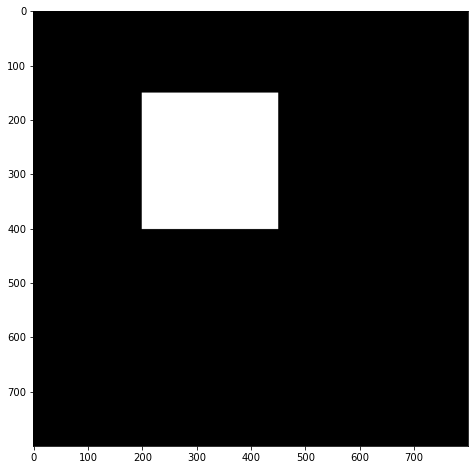

In [38]:
# Make a copy of the canvas and draw a white square of size 250 x 250 on top of the copy of the canvas
white_square = black_canvas.copy()

cv2.rectangle(white_square, (200, 150), (450, 400), (255,255,255), -1)
plt.figure(figsize=(12, 8))
plt.imshow(white_square, cmap='gray');

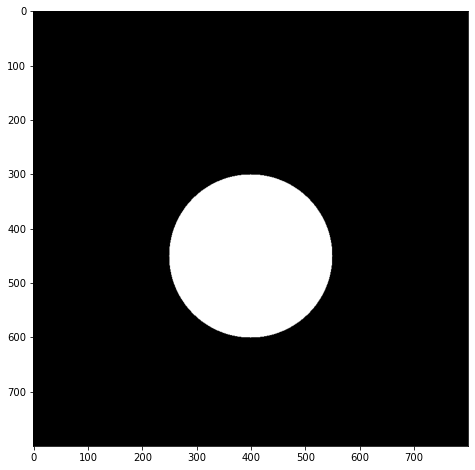

In [39]:
# Make a copy of the origina lcanvas and draw a white circle of size 200 x 200 on top of the copy of the canvas
# Make sure the circle is in a different position of the canvas than the square
white_circle = black_canvas.copy()

cv2.circle(white_circle, (400, 450), 150, (255,255,255), -1)
plt.figure(figsize=(12, 8))
plt.imshow(white_circle, cmap='gray');

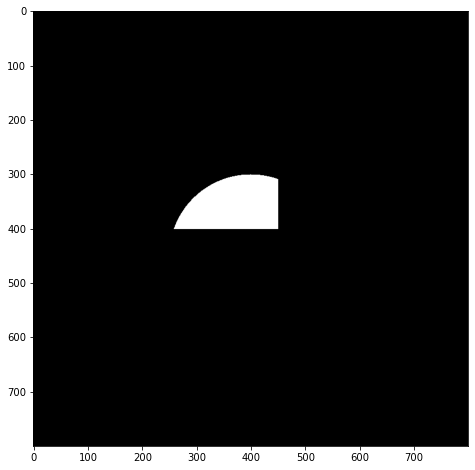

In [40]:
# Create a new image and merge both previous images (square and circle) with a bitwise and operation
and_img = cv2.bitwise_and(white_square, white_circle)
plt.figure(figsize=(12, 8))
plt.imshow(and_img, cmap='gray')

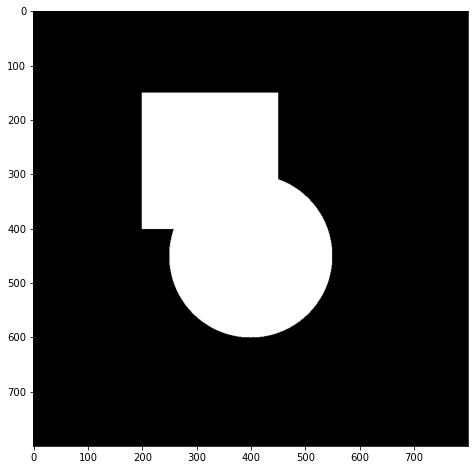

In [42]:
# Create a new image and merge both previous images (square and circle) with a bitwise or operation
or_img = cv2.bitwise_or(white_square, white_circle)
plt.figure(figsize=(12, 8))
plt.imshow(or_img, cmap='gray')

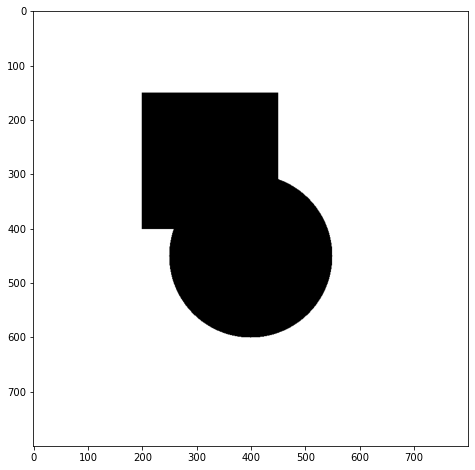

In [44]:
# Create a new image and merge both previous images (square and circle) with a bitwise not operation
not_img = cv2.bitwise_not(or_img)
plt.figure(figsize=(12, 8))
plt.imshow(not_img, cmap='gray')

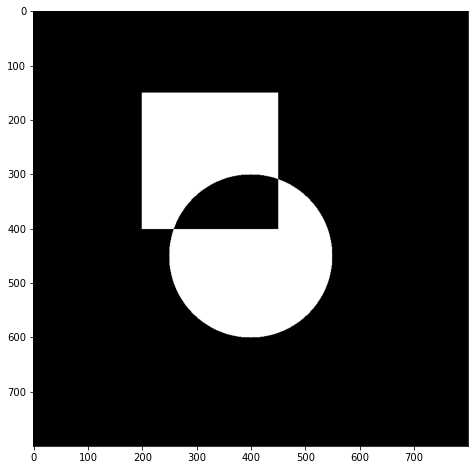

In [45]:
# Create a new image and merge both previous images (square and circle) with a bitwise xor operation
xor_img = cv2.bitwise_xor(white_square, white_circle)
plt.figure(figsize=(12, 8))
plt.imshow(xor_img, cmap='gray')

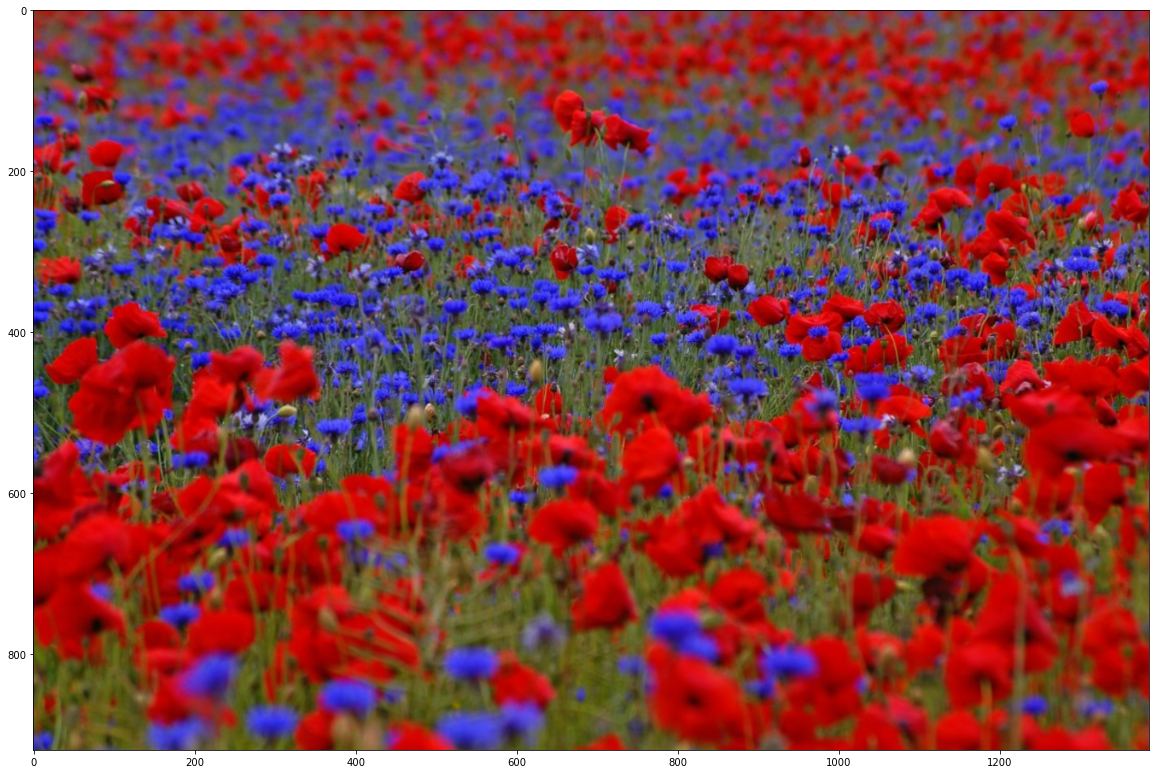

In [46]:
# Load a color image and convert it to HSV
# Identify a prominent color from the image and filter it out
# Create a mask for that color and apply a bitwise and specifying the mask to show only this part of the image

img = cv2.imread('img/blue-red-flowers.png')
plt.figure(figsize = (20,15));
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));


In [47]:

hsv_m = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


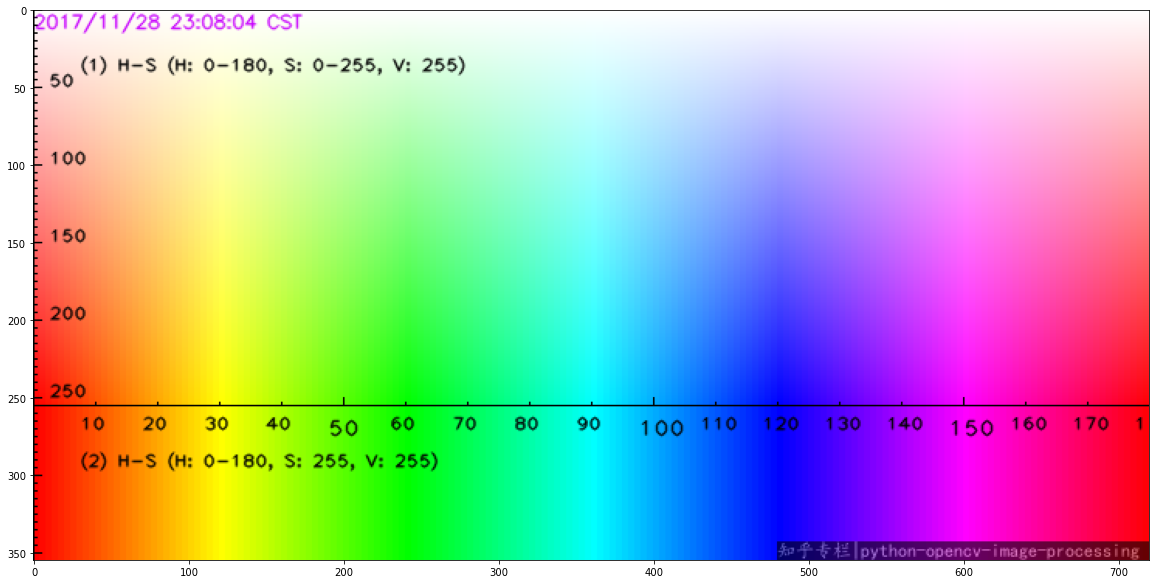

In [56]:
hsv_map = cv2.imread('./img/hsv.png')
plt.figure(figsize = (20,15));
plt.imshow(cv2.cvtColor(hsv_map,cv2.COLOR_BGR2RGB));

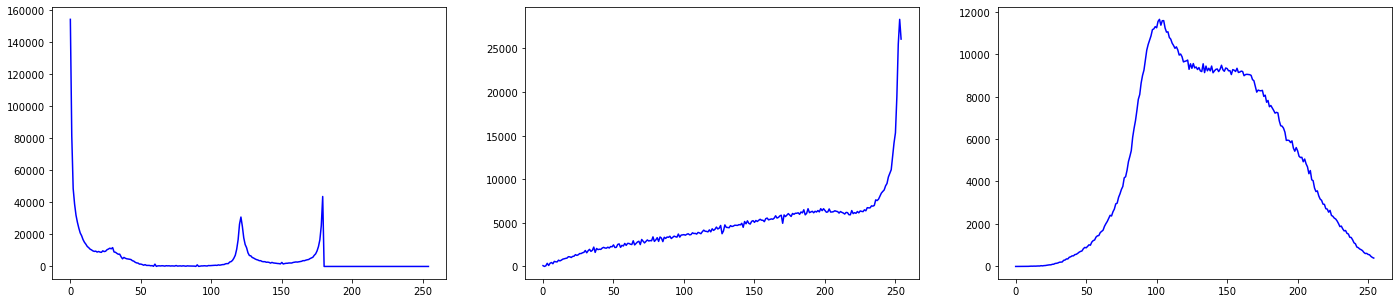

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,5))

hue =cv2.calcHist([hsv_m], [0], None, [255], [0,255])
ax1.plot(hue, color='b')
saturation =cv2.calcHist([hsv_m], [1], None, [255], [0,255])
ax2.plot(saturation, color='b')
value =cv2.calcHist([hsv_m], [2], None, [255], [0,255])
ax3.plot(value, color='b')

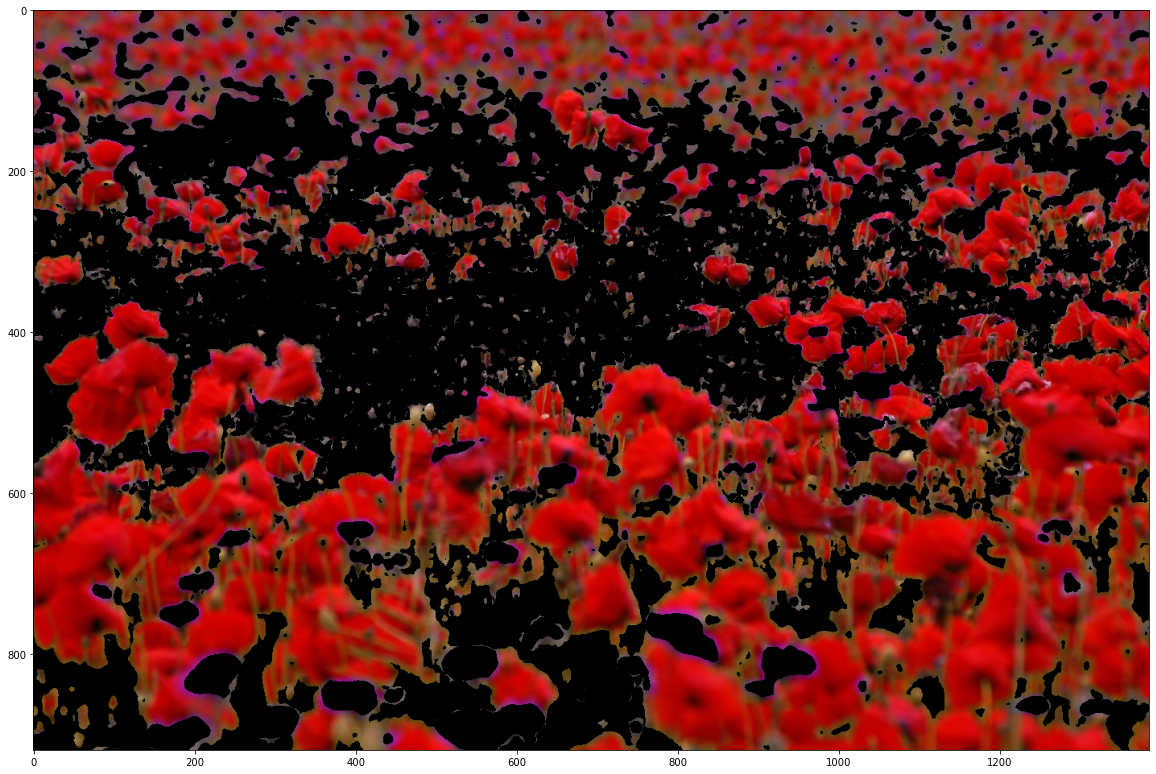

In [83]:
lower_red1 = (0, 0, 0)
upper_red1 = (20, 255, 255)
lower_red2 = (150, 0, 0)
upper_red2 = (180, 255, 255)

red_filter1 = cv2.inRange(hsv_m, lower_red1, upper_red1)
red_filter2 = cv2.inRange(hsv_m, lower_red2, upper_red2)

red_filter = red_filter1 + red_filter2
# red_filter = cv2.merge([red_filter, red_filter, red_filter])
# and_filter = cv2.bitwise_and(red_filter)

masked_img = img.copy()
# masked = cv2.bitwise_and(masked_img, red_filter)
masked_img[red_filter == 0] = [0, 0, 0]

plt.figure(figsize = (20,15));
plt.imshow(cv2.cvtColor(masked_img,cv2.COLOR_BGR2RGB));

In [ ]:
# With the same image and mask you have created above now apply a bitwise not specifying the mask 
# to show everything but the color you masked out before


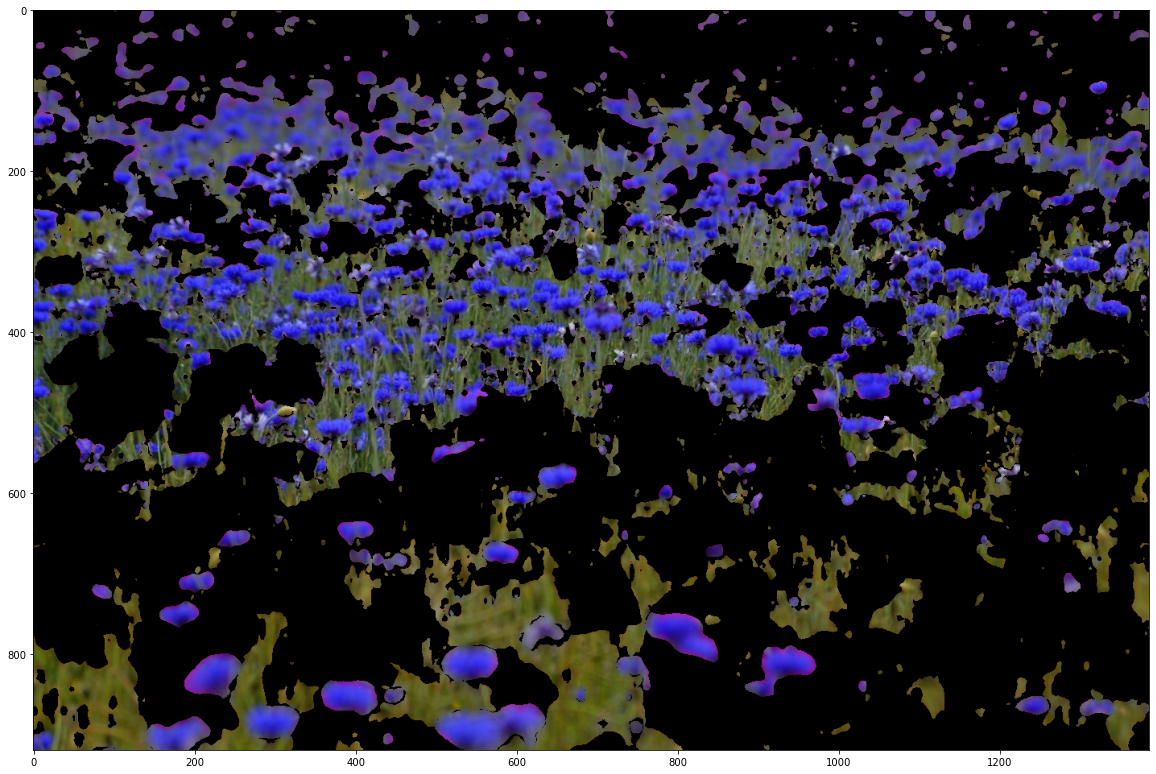

In [84]:
H, S, V = cv2.split(hsv_m)

lower_red1 = (0, 0, 0)
upper_red1 = (20, 255, 255)
lower_red2 = (150, 0, 0)
upper_red2 = (180, 255, 255)

red_filter1 = cv2.inRange(hsv_m, lower_red1, upper_red1)
red_filter2 = cv2.inRange(hsv_m, lower_red2, upper_red2)

red_filter = red_filter1 + red_filter2
not_filter = cv2.bitwise_not(red_filter)


masked_img = img.copy()
masked_img[not_filter == 0] = [0, 0, 0]


plt.figure(figsize = (20,15));
plt.imshow(cv2.cvtColor(masked_img,cv2.COLOR_BGR2RGB));